In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C://Users/naikp/Downloads/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.drop(['id','date','lat','long'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,1800,7503


In [4]:
X=df.drop('price', axis=1)
#X=df.drop(['price','yr_renovated','waterfront','view','sqft_above'], axis=1)
y=df.price

In [5]:
df.shape

(21613, 17)

In [6]:
#checking rows which have nulls
df[df['sqft_above'].isnull()==True]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
10,662500.0,3,2.5,3560,9796,1.0,0,0,3,8,NaN,1700,1965,0,98007,2210,8925
17,485000.0,4,1.0,1600,4300,1.5,0,0,4,7,NaN,0,1916,0,98103,1610,4300


In [7]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

C:\Users\naikp\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\naikp\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [8]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=0)

In [10]:
#Apply XGB
xg_reg = xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=10,n_estimators=10)
xg_reg.fit(X_train, y_train)
xg_pred = xg_reg.predict(X_test)

[10:50:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [11]:
rmse = np.sqrt(mean_squared_error(y_test, xg_pred))
print('RMSE: %f'%(rmse))

RMSE: 300569.390321


In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, xg_pred)

0.24034043738843347

In [13]:
params = {'objective':'reg:linear', 'colsample_bytree':0.3, 'learning_rate':0.1, 'max_depth':5, 'alpha':10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10,
                   metrics='rmse', as_pandas=True, seed=123)

[10:50:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[10:50:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[10:50:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [14]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,601738.583333,2493.683105,602212.770833,4730.397218
1,551768.083333,2571.134337,552375.000000,5016.271352
2,510193.593750,4446.076182,511629.802083,4633.348332
3,471330.562500,2457.612705,473181.020833,8578.860135
4,435668.031250,2807.910697,438075.583333,10089.448818


In [15]:
cv_results.tail(1)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
49,145023.145833,4265.822614,172498.541667,11095.466263


In [16]:
xg_reg2 = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=50)

[10:50:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [17]:
final_dmatrix = xgb.DMatrix(data=X_test, label=y_test)

In [18]:
preds = xg_reg2.predict(final_dmatrix)
r2_score(y_test,preds)

0.823672596540383

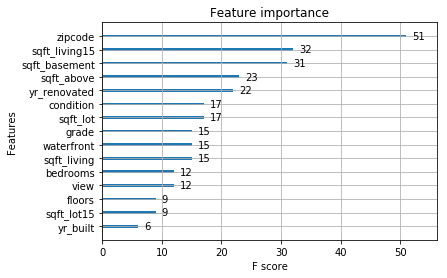

In [19]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [50,10]
plt.show()

In [20]:
df.dropna(inplace=True)
X=df.drop('price', axis=1)
y=df.price
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
y_prediction = LR.predict(X_test)
from sklearn.metrics import r2_score
linear = r2_score(y_test, y_prediction)
linear

0.6562187342016459

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
X_poly
PR = poly_reg.fit(X_poly, y_train)
LR2 = LinearRegression()
LR2.fit(X_poly, y_train)
y_prediction_poly = LR2.predict(poly_reg.fit_transform(X_test))
polynomial = r2_score(y_test, y_prediction_poly)
polynomial

-3.943820616819001

In [23]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(random_state=0, n_estimators=100)
RFR.fit(X_train, y_train)
y_prediction_rf = RFR.predict(X_test)
random_forest = r2_score(y_test, y_prediction_rf)
random_forest

0.8312169311597277

In [24]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=5)
DTR.fit(X_train, y_train)
y_prediction_tree = DTR.predict(X_test)
decision_tree = r2_score(y_test, y_prediction_tree)
decision_tree

0.65117586153829

In [25]:
from sklearn.svm import SVR
SVR = SVR(kernel='rbf')
SVR.fit(X_train, y_train)
y_prediction_svr = SVR.predict(X_test)
SVM = r2_score(y_test, y_prediction_svr)
SVM

C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.06437252165944152

In [26]:
#Results of various regression techniques
print("linear {} %\npolynomial {} %\nrandom_forest {} %\ndecision_tree {} %\nSVM {} %".format(linear*100,polynomial*100,random_forest*100,decision_tree*100,SVM*100))

linear 65.62187342016459 %
polynomial -394.3820616819001 %
random_forest 83.12169311597277 %
decision_tree 65.117586153829 %
SVM -6.437252165944152 %
